## Reinforcement Machine Learning

- Algorithm that learns to react to an environment.

Components:
- Agent - a piece of code implementing a particular policy. 
- Environment - a model of the world that is external to the agent.

Based on the environment, the agent takes a specific action. Based on that action, the agent receives a reward, which may be a good reward or a bad reward.
Whenever the agent is receiving a reward, the state of that particular agent may change.

## Demonstration:

### Finding the shortest path using reinforcement learning using Python Q-learning.

In [2]:
import numpy as np
import pylab as plt
import networkx as nx #for visualization

In [3]:
# map cell to cell, add circular cell to goal point
points_list = [(0,1), (0,6), (1,5), (5,6), (5,8), (5,4), (1,2), (2,3), (2,7), (2,4)]     #possible direction that one can go

In [4]:
#starting point is 0, goal is 7
goal = 8

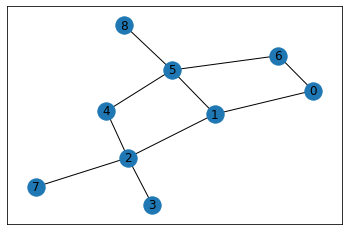

In [5]:
#visualizing the points
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [6]:
#declare a matrix size, representing the number of x points in the graph
MATRIX_SIZE = 9

#take the points list and fill out the values in the reward matrix -  in a form readable by the Q-learning algorithm. 
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))   #matrix x*y
R *= -1
print('Initialized matrix R is:', R)   #note: all -1

Initialized matrix R is: [[-1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.]]


In [7]:
#change the values to be 0 if it is a viable path and 100 if it is a goal path
for point in points_list:
    print(point)
    if point[1] == goal:
        #print(goal)
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

(0, 1)
(0, 6)
(1, 5)
(5, 6)
(5, 8)
(5, 4)
(1, 2)
(2, 3)
(2, 7)
(2, 4)


In [8]:
# add goal point round trip
R[goal,goal]= 100

In [9]:
print("R: ",R)    #y-axis is the state where you are currently located; the x-axis is the possible next actions.
#anywhere that it cannot go gets a -1 value, where it can go but it does not reach the reward gets a 0 and anywhere it can go and reach the reward gets a 100.
#note:indexes are 0,1,2,3,4,5,6,7,8 vertically and horizontally.
#Think of it as a reward matrix.

R:  [[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [  0.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.   0.   0.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1. 100.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1. 100.]]


### Building a Q-learning matrix that holds all the lessons learned. We use a Q-learning model that consists of a transitional rule formula and gamma as the learning parameter.

In [10]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

In [11]:
# learning parameter/rate - generally set between 0 and 1. 0 means that the Q-values are never updated hence nothing is learned. A high value say 0.9 means learning can occur quickly.
gamma = 0.8

In [12]:
#defining intial state
initial_state = 1

#defining the available actions
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))     #the next action is randomly chosen from list of available steps.
    return next_action

action = sample_next_action(available_act)

#updating the Q matrix based on the path selected. Q matrix keeps a tally.
def update(current_state, action, gamma):

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value   #Q-function for finding new Qvalue for state and action. New Q(s,a)=current Q(s,a)+learning rate[reward+max.reward-current Qvalue]
  print('max_value', R[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state, action, gamma)

max_value 0.0


0

In [13]:
## Training Function - using 800 iterations
scores = []
for i in range(800):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:") #ideal moves to the destination
print(Q/np.max(Q)*100)

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 180.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 244.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 295.20000000000005
Score: 182.65582655826557
max_value 236.16000000000005
Score: 262.6558265582656
max_value 0.0
Score: 262.6558265582656
max_value 0.0
Score: 262.6558265582656
max_value 0.0
Score: 262.6558265582656
max_value 0.0
Score: 262.6558265582656
max_value 236.16000000000005
Score: 342.6558265582656
max_value 0.0
Score: 342.6558265582656
max_value 0.0
Score: 342

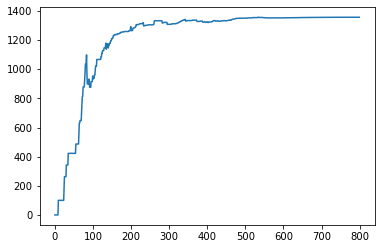

In [14]:
plt.plot(scores) #plotting the learning journey in finding the shortest route.
plt.show()

In [15]:
#Testing Function - to find the best path starting from 0 and 8 as destination by evaluating the steps where the score was max.
current_state = 0
steps = [current_state]

while current_state != 8:

    next_step_index = np.where(Q[current_state,]
        == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[0, 6, 5, 8]


In [16]:
##note:3,4,5 and 6 are false paths because the goal is to get from 0 to 7.

### Conclusion:

Steps in the algorithm:
    
* Initialize the Q-values, define the initial state, goal.      
* Observe the current state.     
* Take an action for that state based on the selection policy.     
* Gain a reward, and a new state based on the step taken.     
* Update the Q-value bearing in mind the gained reward and the maximum reward possible.     
* Move to and update the state then repeat the process until you reach the goal, in this case 8.     